## Introduction

Now that we've discussed A/B testing, we're going to walk through a business case. Get ready to optimize!

You've recently started your own business, Your Name Here Corp. (aka YNHC). As head Data Scientist, your first goal is to get your sales conversion rate high enough to make some money, and gather enough data to build useful models.

In this lab, you will be expected to design and analyze an A/B test. At the end you will need to deliver a short stakeholder presentation outlining your test design, findings, and next steps.

## Requirements

+ Design an A/B test to optimize conversions on YNHC.com
+ Analyze the (simulated) test results to determine a winning variant
+ Create a stakeholders presentation describing design, analysis, and next steps

Bonus:

+ Perform the same analysis on [this dataset](./CTR_Sim.csv) used in week 8 (use the weekend/week delineation as your different variants)
+ Create a proposal for a Multi-Variate test on YNHC.com

## Part 1: Design

For this section you'll be asked to design an A/B test. The process of designing a test like this requires business decisions. Be creative- feel free to fill in the blanks, creating an identity for Your Name Here Corp. The brand identity and subsequent customer base will help decide which elements you wish to test and how you will design your test variant. This will involve the following:






#### 1.  Decide on an element you wish to change, and explain why you think it will lead to a higher conversion rate. You will be expected to create 2 variants to test.

_As an online retailer, we are experimenting with using target advertisement on our landing page as opposed to our normal advertisement consisting of 'Daily Deals'. We believe that advertising items that are more relevant to specific users will cause more conversions as individuals are more likely to buy something that is relevent to them as opposed to something that has a price drop but is not as relevant._
_There will be 2 separate landing pages to test._
>- _a.)One with 'Daily Deals' advertisement._
>- _b.)One with targeted advertisement._

#### 2.  Create a chart like the one below to display the variants under test.

In [1]:
# Usual import block
import numpy as np
import scipy.stats as stats
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

#renamed the data when I imported it to reflect my A/B test
cols = ['conversions','lands','targeted']
# Targeted column is a boolean to represent if targeted ads were run or not.  1:True, they were run, 0:False, they were not
ctr = pd.read_csv('CTR_sim.csv',names =cols )
#get rid of those old column names that become column 1
ctr.drop(labels = 0, inplace = True)

# Because they became object columns because of the original labels i need to re-numeric them.
ctr[['conversions','lands','targeted']] = ctr[['conversions','lands','targeted']].apply(pd.to_numeric)

# Since conversions and lands can vary across days I'm going to create a conversion ratio column.
ctr['conversion_ratio']= (ctr['conversions']/ctr['lands']).round(2)


ctr.head(3)

,conversions,lands,targeted,conversion_ratio
1,11,19,0,0.58
2,10,20,0,0.50
3,11,17,0,0.65


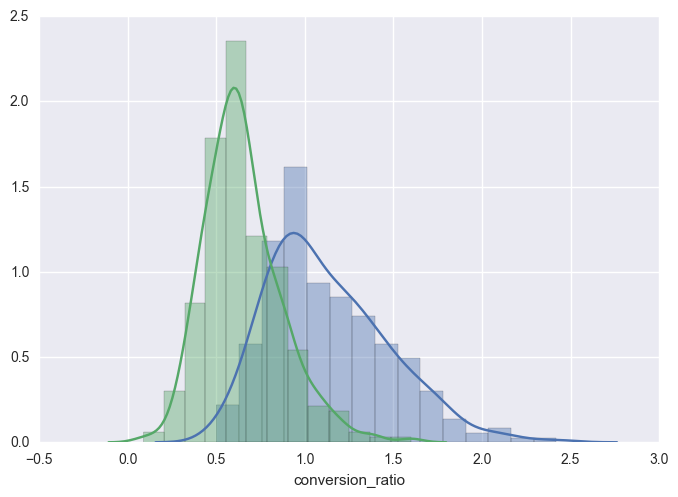

In [2]:
# Splitting my data up to graph it
target = ctr[['conversions','lands','conversion_ratio']].where(ctr['targeted']==1)
target.dropna(inplace = True)
target.reset_index(inplace = True)

b_deals = ctr[['conversions','lands','conversion_ratio']].where(ctr['targeted']==0)
b_deals.dropna(inplace=True)
b_deals.reset_index(inplace = True)

# As T tests run best with equal sample sizes im dropping rows to make samples even.
# Also my hypethetical test was equally balanced in that Targeted and Non-Targeted ads were run an equal number of times.
b_deals.drop(b_deals.index[285:], inplace = True)

import seaborn as sns
# In Blue: Distribution of Conversion Ratios with Targeted Ads
sns.distplot(target['conversion_ratio'], bins = 15)
# In Green: Distribution of Conversion Ratios with Daily Deals Ads
sns.distplot(b_deals['conversion_ratio'], bins = 13)
plt.show()
# I changed my bin numbers so that the bins had a relatively equal size, 
# *sigh* I wish bin_size was a argument...


these distributions definitely look different.

#### 3.  Once completed, report in to your instructor. He will provide your test results for analysis.

I AM THE INSTRUCTOR

## Part 2: Analysis

Now that you've recieved your group's unique set of test results, you're ready to analyse. Using the skills covered in the last lesson, as well as some techniques covered in the last few weeks, produce a full analysis of your test results. In either an ipython notebook or an Excel spreadsheet, perform your analysis with complete documentation. This will be a part of your final deliverable.


In [3]:
# Imports if you only care about the AB Testing
import numpy as np
import scipy.stats as stats
import pylab as pl
%matplotlib inline

a = b_deals['conversion_ratio']
b = target['conversion_ratio']



In [4]:
stats.ttest_ind(b, a)


# a,b caused a negative t-value



Ttest_indResult(statistic=20.029782453714503, pvalue=6.4497970263561775e-68)

![](t-values.png)

**Degrees of freedom** are often broadly defined as the number of "observations" (pieces of information) in the data that are free to vary when estimating statistical parameters.
I Think what this means is " How many observations from our dataset are we ok with being a little off".
Low degrees of freedom implys that we are not ok with many observations varying, being that we believe that a low sample size can be representative of the population.  Such as if we're calculating a mean.  

**P-Value**
As the P-Value is (significantly) less than than 0.01 we can conclude with 99% confidence that the two samples did not come from the same population and thus there is a signification difference between A and B.  In other words, Having targeted ads on the landing page does result in higher conversion rates as opposed to the default landing page.

**T-Score Statistic**
The T-Value (20.029) is way above the range of Critical T-Values (Apart from when the Degrees of Freedom =1), this can also be used as a indicator that the there is a significant difference between A and B

## Part 3: Deliverable

In a markdown cell in your Jupyter notebook, describe your test design, the results, and analysis.

The first part of your stakeholder's discussion will cover the design decisions made. Include any descriptions of the decisions made while designing the test. This section should answer questions such as:

The second portion of your results should cover the results of your analysis. You should explain which tests you used, what they told you, and what you believe the best next steps are for YNHC.com.

Which variant won?
+ Based on the analysis done, what is your level of confidence in the results?
+ How can these results inform business decisions?
+ The final portion of your write-up should include a proposal for a future test. This one will be a Multi-Variate test. Include test design, description of potential benefits, and discussion about challenges in analysing the test's results.

According to our T-Test, having Targeted ads on our landing page creates a statistically significant increase in conversion rate.  I can say this with a 99% level of confidence.  
>"What does that mean?" you may ask.

Basically, I'm saying that if we ran this test 100 times over.  99 of 100 would come to the same conclussion that the Targeted Ads result in a better conversion rate than our current landing page.

Going forward I am wondering if there is a way the we can have daily deal targeted ads.  If we develop a light algorith for targeting that can be quickly applied daily I would like to test if this would result in significantly higher conversion rates as well.  In this test, I would like to test a third variable being that It is possible that users may find ads on the landing page a nussance and I would also like to test the significance of not having any at all.